# Random Forest modeling

##### Import libraries and data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score

# import data
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")

train.drop(["fbs_1", "cp_3", "restecg_2", "thal_1", "ca_4"], axis=1, inplace=True)

val.drop(["fbs_1", "cp_3", "restecg_2", "thal_1", "ca_4"], axis=1, inplace=True)

# 1. Split X and y

In [2]:
# seperate X and y variables
X = train.drop("target", axis=1)
y = train.target
cols = X.columns

X_val = val.drop("target", axis=1)
y_val = val.target

# 2. Scaling

In [3]:
# scake data with standard scaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_val = sc.transform(X_val)

X = pd.DataFrame(X, columns=cols)
X_val = pd.DataFrame(X_val, columns=cols)

# 3. Hyperparameter tuning

In [4]:
# create a parameter grid and conduct grid search
params = {
    "max_depth":[2, 3, 4, None],
    "min_samples_leaf":[2, 3, 4],
    "n_estimators":[50, 100, 150]
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
gs.fit(X, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [5]:
# find best parameters
gs.best_params_

{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 150}

In [6]:
# save the model
model1 = gs.best_estimator_

# Performance Metrics

In [7]:
# find performance metrics for train and val sets
model1.fit(X, y)
train_pred = model1.predict(X)
y_pred = model1.predict(X_val)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       120
           1       0.98      0.98      0.98       124

    accuracy                           0.98       244
   macro avg       0.98      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244


 validation scores
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       1.00      0.68      0.81        19

    accuracy                           0.79        28
   macro avg       0.80      0.84      0.78        28
weighted avg       0.87      0.79      0.79        28



## Problem: Over fitting

The train set did much better than the validation set. I will try to fix this problem by lowering the max depth parameter

In [25]:
# create a parameter grid and conduct grid search
params = {
    "max_depth":[2],
    "min_samples_leaf":[2, 3, 4],
    "n_estimators":[50, 100, 150]
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
gs.fit(X, y)
model1 = gs.best_estimator_

In [26]:
# find performance metrics for train and val sets
model1.fit(X, y)
train_pred = model1.predict(X)
y_pred = model1.predict(X_val)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       120
           1       0.80      0.81      0.80       124

    accuracy                           0.80       244
   macro avg       0.80      0.80      0.80       244
weighted avg       0.80      0.80      0.80       244


 validation scores
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       1.00      0.68      0.81        19

    accuracy                           0.79        28
   macro avg       0.80      0.84      0.78        28
weighted avg       0.87      0.79      0.79        28



The model is still not performing well.

## Feature importances

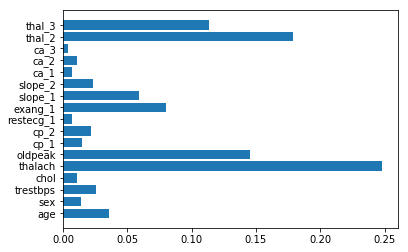

In [27]:
plt.barh(X.columns, model1.feature_importances_)
plt.show()

# Recreate data with only the best features

In [30]:
# select best features
X_t = pd.concat([X.thal_3, X.thal_2, X.oldpeak, X.thalach], axis=1)
X_val_t = pd.concat([X_val.thal_3, X_val.thal_2, X_val.oldpeak, X_val.thalach], axis=1)

# Hyperparameter tuning

In [36]:
# create a parameter grid and conduct grid search
params = {
    "max_depth":[2, 3],
    "min_samples_leaf":[2, 3, 4],
    "n_estimators":[50, 100, 150]
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
gs.fit(X_t, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [37]:
# find best parameters
gs.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 100}

In [38]:
# save the model
model2 = gs.best_estimator_

# Performance Metrics

In [39]:
# find performance metrics for train and val sets
model1.fit(X, y)
train_pred = model1.predict(X)
y_pred = model1.predict(X_val)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       120
           1       0.81      0.82      0.82       124

    accuracy                           0.81       244
   macro avg       0.81      0.81      0.81       244
weighted avg       0.81      0.81      0.81       244


 validation scores
              precision    recall  f1-score   support

           0       0.56      1.00      0.72         9
           1       1.00      0.63      0.77        19

    accuracy                           0.75        28
   macro avg       0.78      0.82      0.75        28
weighted avg       0.86      0.75      0.76        28



## Precision Recall Tradeoff

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


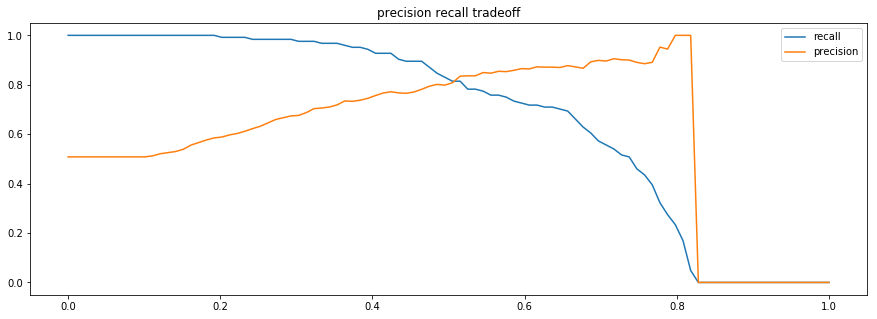

In [41]:
# conduct precision recall tradeoff
probs = model1.predict_proba(X)[:, 1]

thresholds = np.linspace(0, 1, 100)

precisions = []
recalls = []
for thresh in thresholds:
    predicted_vals = [1 if prob > thresh else 0 for prob in probs]
    precisions.append(precision_score(y, predicted_vals))
    recalls.append(recall_score(y, predicted_vals))

plt.figure(figsize=(15, 5))
plt.plot(thresholds, recalls, label="recall")
plt.plot(thresholds, precisions, label="precision")
plt.title("precision recall tradeoff")
plt.legend()
plt.show()

It seems the best threshold is around 0.2 

In [42]:
# explore performance metrics after precision recall tradeoff
probs = model1.predict_proba(X)[:, 1]
train_pred = [1 if prob > 0.2 else 0 for prob in probs]

probs = model1.predict_proba(X_val)[:, 1]
y_pred = [1 if prob > 0.2 else 0 for prob in probs]

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       120
           1       0.59      1.00      0.74       124

    accuracy                           0.65       244
   macro avg       0.80      0.64      0.59       244
weighted avg       0.79      0.65      0.59       244


 validation scores
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

